## Student Name: Roshnaey Khattak

### Step 1 – Data Acquisition
Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [ ]:
!pip install tensorflow

In [1]:
#import any required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import numpy as np

In [2]:
#Load the data and view the dimensions

file     = '/Users/roshnaey/desktop/house_prices_train.csv' #TODO: provide the url for the training data
data     = pd.read_csv(file)
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [3]:
#view a few observations
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.index

RangeIndex(start=0, stop=1460, step=1)

#### Use your intuition!
At first glance is there any field that, without a doubt, will not contribute to the predictions?

In [5]:
# At first glance, it appears that I will not need the following columns: 
### ID
### LotFrontage
### Alley
### BldgType
### RoofMatl
### MasVnrType
### MasVnrArea
### ExterQual
### ExterCond
### LowQualFinSF
### GrLivArea
### GarageYrBlt
### GarageArea

In [6]:
#TODO: remove/exclude the unnecessary field(s) that will not contribute towards the prediction
del data['Id']
del data['LotFrontage']
del data['Alley']
del data['BldgType']
del data['RoofMatl']
del data['MasVnrType']
del data['MasVnrArea']
del data['ExterQual']
del data['ExterCond']
del data['LowQualFinSF']
del data['GrLivArea']
del data['GarageYrBlt']
del data['GarageArea']

### Step 2 – Data Exploration
- Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
- View the frequency of missing values.

In [7]:
#TODO: gather descriptive statistics to view the range of values in each field. 
statistics = data.describe()
print(statistics)

        MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   443.639726    46.549315   567.240411  1057.429452  ...   
std       20.645407   456.098091   161.319273   441.866955   438.705324  ..

In [8]:
#TODO: show the frequency of missing values
nulltable = data.isnull().sum()
pd.set_option('display.max_rows', None)
print (nulltable)

MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces

State your observations about the summary statistics and missing values **(in this cell)**:
 

 
 

- From our missing value table we can see that the columns PoolQC, Fence, and MiscFeature have the highest number of missing values, followed by FireplaceQu. The majority of the columns for garage information were missing 81 values, which would most likely be attributed to 81 of the surveyed homes not having garages. The same could be said about the baseement information variables, where the majority of the columns with missing values were missing 37 or 38 samples.
- Upon first glance of the information in the YearBuilt column, I was worried that since the first house was built in the 1800s, we would have to take into account inflation for the price. However, since the sale data ranges from 2006 to 2010 we won't have to worry too much about inflation. 
- I am also a bit concerned over the minimum value for SalePrice, since 34,900 USD is a very low price for homes, especially compared to the rest of the dataset. I can't help but wonder if there was a mistake in inputting that single sample. 

Note: recall that not all missing values need to be deleted, some of them can be imputed.

#### The continuous and categorical independent variables
List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the `count` that is reported above. 

For the fields that are discussed, view `data_description.txt` which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**


#### The dependent variable
Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?

Text(0, 0.5, 'Frequency')

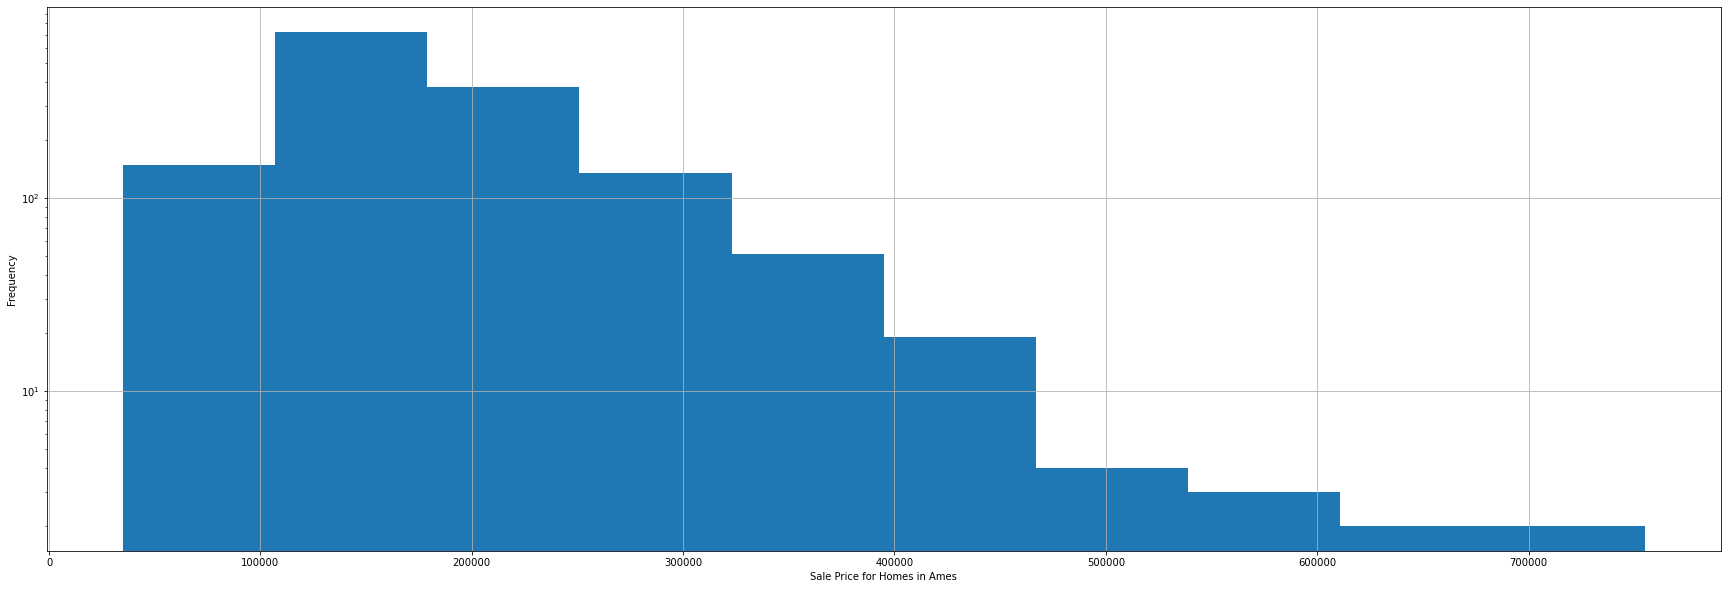

In [9]:
#TODO: Plot the histogram
histogram = data['SalePrice'].hist(bins = 10, figsize = (30, 10))
histogram.set_yscale('log')
histogram.set_xlabel("Sale Price for Homes in Ames")
histogram.set_ylabel("Frequency")

In [10]:
# As we can see, the distribution is skewed to the right. 

## Building the Pipeline
Based on your recommendations above, lets build a pipeline that does the following:
- prepare the data and perform data imputation
- transform the continuous and categorical data (scaling and encoding respectively)
- select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
- build, train and evaluate the neural network using Keras.
- perform hyper-parameter tuning using RandomSearchCV **(optional)**
- make predictions with new data

### Step 3 – Data Preparation
Here is some helpful information on [preprocessing and feature extraction pipelines in scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

<span style="color:red">NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data` </span>

In [11]:
#impute missing continuous values with the median and scale the data

continuous_features  = [
'LotArea',
'YearBuilt',
'YearRemodAdd',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'GarageCars'] #TODO: provide a list of continuous fields that will be used in the model(except the dependent variable)
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])


In [12]:
#impute the NA categorical values and encode the data

categorical_features = [
'MSSubClass',
'MSZoning',
'Street',
'LandContour',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'HouseStyle',
'OverallQual',
'OverallCond',
'RoofStyle',
'Exterior1st',
'Exterior2nd',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition'] #TODO: provide a list of categorical fields that will be used in the model

In [13]:
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

In [14]:
data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).

### Step 4 – Data Transformation & Feature Selection
Here is some helpful information on [feature selection as part of a pipeline](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline). If you add a feature selection algorithm to the pipeline, ensure that it supports regression.

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [16]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
                     ('feature_selection', SelectKBest()), #TODO: identify a feature selection algorithm or exclude this line if you have previously performed feature selection on the data.
                     #('classification', RandomForestClassifier()), 
                    ])

In [17]:
transformed_data = data_prep_pipeline.fit_transform(data.iloc[:,:-1], data['SalePrice']) #transform the data

/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


### Step 5 – Building the Model
#### Build the neural network using Keras
Build a feed forward neural network with: an input layer, hidden layers and one output layer. 

Note: you are required to provide a suitable [optimizer](https://keras.io/api/optimizers/) and [loss function](https://keras.io/api/losses/) for the regression task. Optimizers include: 'Adam', 'SGD' and RMSprop. Loss functions include: 'mean_squared_error', 'mean_squared_logarithmic_error', 'mean_absolute_error'

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
X = transformed_data #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

In [20]:
#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
ffnn_model.add(Dense(40, activation='relu', input_shape=(X.shape[1],))) #X.shape[1] is the number of selected features

In [21]:
#TODO: Add the first hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(27, activation = 'relu'))

In [22]:
#TODO: Add the second hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(18, activation = 'relu'))

In [23]:
#TODO: Add the output layer
ffnn_model.add(Dense(12, activation = 'softmax'))

In [24]:
ffnn_model.compile(optimizer = "sgd", #TODO: state the optimize
                   loss = "mse",      #TODO: state the loss function
                   metrics =  "accuracy"   #TODO: state the metric
                  )

In [25]:
print ("X: ", type(X))
print("y: ", type(y))

X:  <class 'scipy.sparse.csr.csr_matrix'>
y:  <class 'pandas.core.series.Series'>


In [26]:
### Since the `validation_split` is only supported for Tensors or NumPy arrays I have to change the X type
X = np.array(X)
y = np.array(y)

In [27]:
ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= 0.4, #TODO: state the validation split
                              epochs= 10, #TODO: state the number of epochs (you may need to run the model a few times to find a suitable value)
                              batch_size= None , #TODO: state the number of observations to use in each batch
                              verbose=1)

IndexError: tuple index out of range

I was able to fix the previous error from the issue made on github. However, I have not been able to debug the above cell. The error is the same as the previous one, however, I'm not sure what index is out of range. When I print X and y the results are what I would expect, so I am a bit lost as far as where to go.

In [ ]:
# Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Let's use the neural network to make predictions!

#### Load the test data

In [ ]:
#TODO: Load the data from `house_prices_test.csv`
test_data_fp = '/Users/roshnaey/desktop/house_prices_test.csv'
test_data = pd.read_csv(test_data_fp)


#### Prepare the test data using the pipeline
This will impute any missing values and scale/encode the fields.

In [ ]:
prep_test_data = data_prep_pipeline.transform(test_data)

#### Use the neural network to make predictions

In [ ]:
result = ffnn_model.predict( #TODO: provide the preprocessed test data (above)
        )

## Summary
Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. What are your recommendations to improve the model in the future?